# Importation des librairies utile pour notre analyse

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
import calendar
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import ks_2samp, chi2_contingency
import pylab
import scipy.stats as stats

# Importation des fichiers à analyser

In [97]:
# On lit les fichiers

customers_df = pd.read_csv("customers.csv")
product_df = pd.read_csv("products.csv")
transaction_df = pd.read_csv("transactions.csv")

# Nettoyage de ces fichiers

## Vérifier s'il y a des valeurs nulles dans nos différents fichiers

In [98]:
customers_df.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [99]:
product_df.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [100]:
transaction_df.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

## Supprimer les doublons s'il y en existe et permet de voir si nos clés sont bien unique

In [101]:
customers_df.loc[customers_df.duplicated(keep=False),:]

,client_id,sex,birth


In [102]:
product_df.loc[customers_df.duplicated(keep=False),:]

,id_prod,price,categ


In [103]:
transaction_df.loc[transaction_df.duplicated(keep=False),:]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Sur le fichier transaction on peut voir qu'il y a des doublons avec des valeurs tests

## Rechercher s'il y a des valeurs aberrantes

In [104]:
list_of_variable = ["client_id", "sex", "birth"]
for var in list_of_variable:
    print ('Pour la variable ', var)
    print ('Maximum : ', customers_df[var].max())
    print('Minimum : ', customers_df[var].min())
    
customers_df["sex"].unique()

Pour la variable  client_id
Maximum :  ct_1
Minimum :  c_1
Pour la variable  sex
Maximum :  m
Minimum :  f
Pour la variable  birth
Maximum :  2004
Minimum :  1929


array(['f', 'm'], dtype=object)

In [105]:
list_of_variable = ["id_prod","price","categ"]
for var in list_of_variable:
    print ('Pour la variable ', var)
    print ('Maximum : ', product_df[var].max())
    print('Minimum : ', product_df[var].min())

Pour la variable  id_prod
Maximum :  T_0
Minimum :  0_0
Pour la variable  price
Maximum :  300.0
Minimum :  -1.0
Pour la variable  categ
Maximum :  2
Minimum :  0


Il y a un prix égal à -1€ ce qui n'est pas cohérent il va falloir régler ce problème

In [106]:
list_of_variable = ["id_prod", "date", "session_id","client_id"]
for var in list_of_variable:
    print ('Pour la variable ', var)
    print ('Maximum : ', transaction_df[var].max())
    print('Minimum : ', transaction_df[var].min())

Pour la variable  id_prod
Maximum :  T_0
Minimum :  0_0
Pour la variable  date
Maximum :  test_2021-03-01 02:30:02.237450
Minimum :  2021-03-01 00:01:07.843138
Pour la variable  session_id
Maximum :  s_99998
Minimum :  s_0
Pour la variable  client_id
Maximum :  ct_1
Minimum :  c_1


Valeurs marquées tests

# Régler les erreurs que nous avons identifié

## Régler le problème du prix

In [107]:
product_df = product_df.loc[product_df["price"]>0]

In [108]:
product_df.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


## Régler le problème de test dans le fichier transaction

In [109]:
transaction_df = transaction_df.loc[~transaction_df["date"].str.contains("test")]

In [110]:
transaction_df.loc[transaction_df.duplicated(keep=False),:]

,id_prod,date,session_id,client_id


Règle également le problème des doublons

## On ajoute également une colonne d'âge au fichier customer

In [111]:
customers_df['age'] = date.today().year - customers_df['birth']

In [112]:
customers_df.describe()

,birth,age
count,8623.000000,8623.000000
mean,1978.280877,44.719123
std,16.919535,16.919535
min,1929.000000,19.000000
25%,1966.000000,31.000000
50%,1979.000000,44.000000
75%,1992.000000,57.000000
max,2004.000000,94.000000


# On merge ensuite nos fichiers

In [113]:
mergin_df = transaction_df.merge(product_df, on = "id_prod")

In [114]:
mergin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   date        679111 non-null  object 
 2   session_id  679111 non-null  object 
 3   client_id   679111 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 36.3+ MB


In [115]:
mergin_df = mergin_df.merge (customers_df, on = "client_id")

In [116]:
mergin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   date        679111 non-null  object 
 2   session_id  679111 non-null  object 
 3   client_id   679111 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  int64  
 6   sex         679111 non-null  object 
 7   birth       679111 non-null  int64  
 8   age         679111 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 51.8+ MB


In [117]:
mergin_df = mergin_df.loc[~mergin_df.date.str.contains("2023")]

In [118]:
mergin_df.describe()

,price,categ,birth,age
count,624458.000000,624458.000000,624458.000000,624458.000000
mean,17.417597,0.440025,1977.807912,45.192088
std,18.263897,0.594331,13.554480,13.554480
min,0.620000,0.000000,1929.000000,19.000000
25%,8.800000,0.000000,1970.000000,36.000000
50%,13.990000,0.000000,1980.000000,43.000000
75%,18.990000,1.000000,1987.000000,53.000000
max,300.000000,2.000000,2004.000000,94.000000


In [119]:
mergin_df.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
age           0
dtype: int64

# calculer et créer le graphique du chiffre d'affaire par année

In [120]:
data_2021 = mergin_df.loc[pd.to_datetime(mergin_df["date"]).dt.year == 2021]
data_2022 = mergin_df.loc[pd.to_datetime(mergin_df["date"]).dt.year == 2022]

CA_2021 = data_2021[["price","id_prod","session_id","date"]].groupby("session_id").sum().sum()
CA_2022 = data_2022[["price","id_prod","session_id","date"]].groupby("session_id").sum().sum()

C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\1744833156.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_2021 = data_2021[["price","id_prod","session_id","date"]].groupby("session_id").sum().sum()
C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\1744833156.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_2022 = data_2022[["price","id_prod","session_id","date"]].groupby("session_id").sum().sum()


In [121]:

print("Le chiffre d'affaire pour l'année 2021 est de :",CA_2021.values[0]," €")
print("Le chiffre d'affaire pour l'année 2022 est de :",CA_2022.values[0]," €")

Le chiffre d'affaire pour l'année 2021 est de : 4769550.91  €
Le chiffre d'affaire pour l'année 2022 est de : 6107006.93  €


Création du graphique

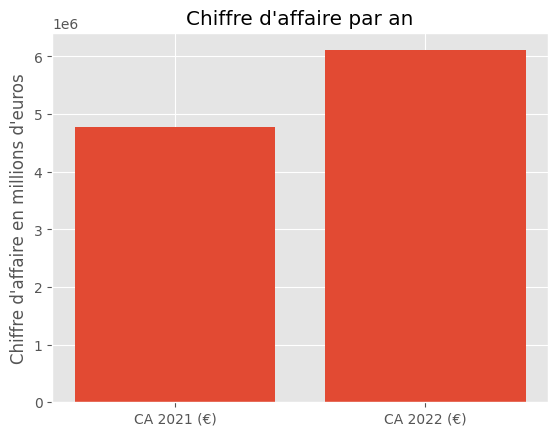

In [122]:
height = [CA_2021.values[0], CA_2022.values[0]]
bars = ("CA 2021 (€)", 'CA 2022 (€)')

fig, ax = plt.subplots()

ax.bar(bars, height)

ax.set_ylabel("Chiffre d'affaire en millions d'euros")
ax.set_title("Chiffre d'affaire par an")

plt.show()

## On plot ensuite le chiffre d'affaire par mois pour 2021 et 2022

In [123]:
data_2021['date'] = pd.to_datetime(data_2021['date'])
data_2021['date'] =  [d.date() for d in data_2021['date']]

C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\2725899971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['date'] = pd.to_datetime(data_2021['date'])
C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\2725899971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['date'] =  [d.date() for d in data_2021['date']]


In [124]:
data_2021['date'] = pd.to_datetime(data_2021['date'])
data_2021['Month'] = data_2021['date'].dt.month
ca_by_month_2021 = data_2021[["Month", "price"]].groupby("Month").sum()

ca_by_month_2021 = ca_by_month_2021.reset_index()
ca_by_month_2021['Month'] = ca_by_month_2021['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])

ca_by_month_2021

C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\175254774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['date'] = pd.to_datetime(data_2021['date'])
C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\175254774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Month'] = data_2021['date'].dt.month


,Month,price
0,Mar,482359.60
1,Apr,475918.37
2,May,492801.97
3,Jun,483989.48
4,Jul,482680.99
5,Aug,482126.16
6,Sep,506964.78
7,Oct,320790.75
8,Nov,516137.68
9,Dec,525781.13


In [125]:
data_2022['date'] = pd.to_datetime(data_2022['date'])
data_2022['Month'] = data_2022['date'].dt.month
ca_by_month_2022 = data_2022[["Month", "price"]].groupby("Month").sum()

ca_by_month_2022 = ca_by_month_2022.reset_index()
ca_by_month_2022['Month'] = ca_by_month_2022['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])

ca_by_month_2022

C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\2930856097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['date'] = pd.to_datetime(data_2022['date'])
C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\2930856097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['Month'] = data_2022['date'].dt.month


,Month,price
0,Jan,525252.59
1,Feb,535431.47
2,Mar,515379.25
3,Apr,492889.68
4,May,516982.35
5,Jun,495908.33
6,Jul,510555.67
7,Aug,506236.49
8,Sep,493956.56
9,Oct,507769.85


Création du graphique

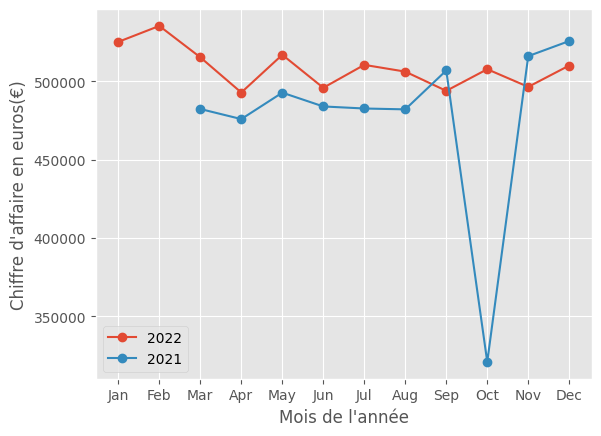

In [126]:
plt.plot(ca_by_month_2022["Month"], ca_by_month_2022["price"], linestyle="-", marker="o", label="2022")
plt.plot(ca_by_month_2021["Month"], ca_by_month_2021["price"], linestyle="-", marker="o", label="2021")
plt.ylabel("Chiffre d'affaire en euros(€)")
plt.xlabel("Mois de l'année")
plt.legend()
plt.show()

On peut voir qu'il y a un problème ici pour le mois d'ocotobre 2021 on regarde ce qu'il se passe pour pouoir régler le problème

In [127]:
#On Stock dans la variable toutes les commandes passées en octobre 2021
df_octobre_2021 = data_2021.loc[(data_2021['date'].dt.year==2021) & (data_2021['Month']==10),:]
df_octobre_2021["date"] = df_octobre_2021["date"].dt.day

C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\1126232117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_octobre_2021["date"] = df_octobre_2021["date"].dt.day


In [128]:
df_octobre_2021 = pd.pivot_table(df_octobre_2021, index = ['date'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});

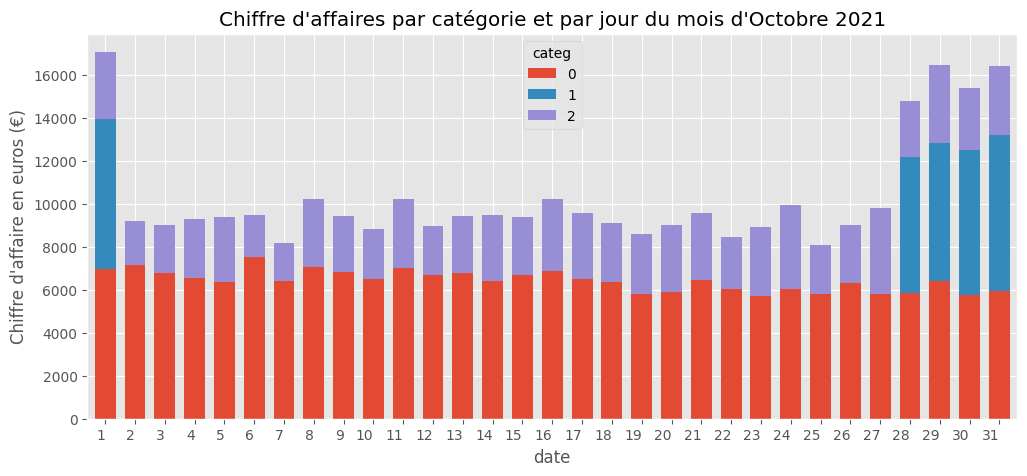

In [129]:
#On affiche le tout sous forme de bar
df_octobre_2021.plot(kind='bar',stacked = True,figsize=(12,5),width = 0.7)
plt.title("Chiffre d'affaires par catégorie et par jour du mois d'Octobre 2021")
plt.ylabel("Chiffre d'affaire en euros (€)")
plt.xticks(rotation =0,ha='right')
plt.show()

Ici on peut voir qu'on a des valeurs manquantes pour la catégorie 1, pour régler se problème plusieurs solutions 
- utiliser du machine learning pour prédire les valeurs
- supprimer les valeurs pour ne pas fausser l'analyse mais celle ci sera incomplète
- essayer d'avoir une approximation en faisant la moyenne des ventes par mois

Dans notre cas on va essayer le machine learning pour prédire ces données, avec l'utilisation de Prophet un algorithme développé par méta

In [130]:
#Pour pouvoir l'utiliser il faut utiliser la commande suivante:
# pip install prophet

Création du dataframe pour pouvoir réaliser la prédiction avec l'algorithme prophet

In [131]:
from prophet import Prophet
m = Prophet()
df = data_2021.loc[(data_2021['date'].dt.year==2021),:]
df = pd.pivot_table(df, index = ['date'], columns = 'categ', values = 'price',aggfunc={'price':'sum'})
df = df.rename(columns = {1 : "price"})
df.reset_index()
df_for_prophet = pd.DataFrame ({"ds" : df.index,"y" : df["price"].values})
data_to_predict = df_for_prophet.loc[(df_for_prophet["ds"] > "2021-10-01") & (df_for_prophet["ds"] < "2021-10-28"),: ]
data_to_predict = pd.DataFrame(data_to_predict["ds"])

In [132]:
m.fit(df_for_prophet)

14:52:05 - cmdstanpy - INFO - Chain [1] start processing
14:52:05 - cmdstanpy - INFO - Chain [1] done processing


In [133]:
forecast = m.predict(data_to_predict)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-10-02,6761.976520,5957.093624,7506.380351
1,2021-10-03,6665.899048,5886.345403,7488.709819
2,2021-10-04,6824.382710,6013.670583,7614.904942
3,2021-10-05,6822.163468,6066.826927,7677.092568
4,2021-10-06,6817.468711,6042.190316,7568.097312


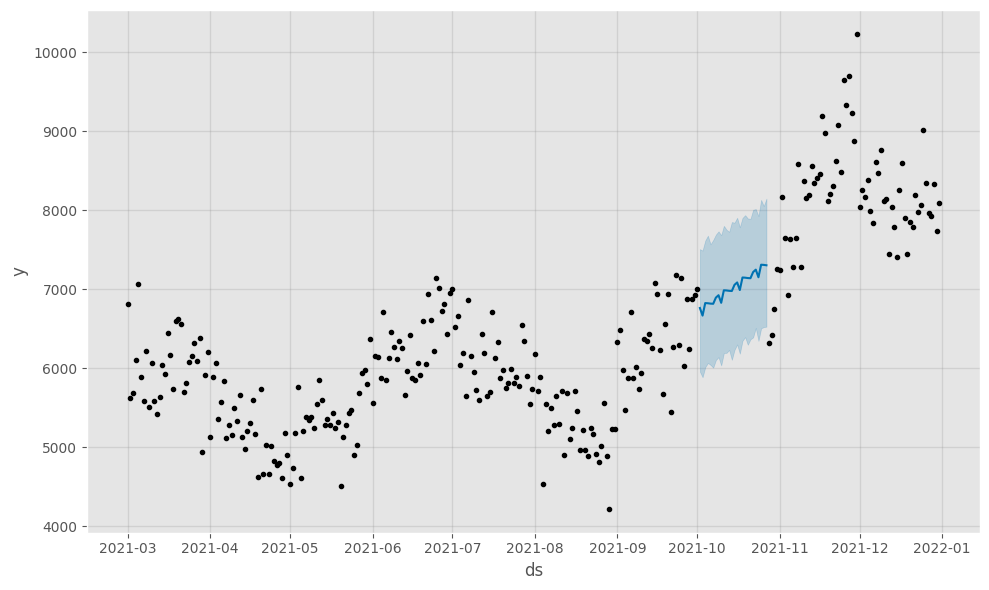

In [134]:
fig1 = m.plot(forecast)

On remplace nos données par les données de prédiction, cependant ici il faut bien garder en tête que l'on fait de la prédiction

In [135]:
df_octobre_2021[1].loc[(df_octobre_2021.index > 1) & (df_octobre_2021.index<28)] = forecast["yhat"].values
ca_by_month_2021["price"].loc[ca_by_month_2021["Month"] == "Oct"] = df_octobre_2021.sum().sum()
ca_by_month_2021

C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\2915798774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_by_month_2021["price"].loc[ca_by_month_2021["Month"] == "Oct"] = df_octobre_2021.sum().sum()


,Month,price
0,Mar,482359.600000
1,Apr,475918.370000
2,May,492801.970000
3,Jun,483989.480000
4,Jul,482680.990000
5,Aug,482126.160000
6,Sep,506964.780000
7,Oct,503305.490261
8,Nov,516137.680000
9,Dec,525781.130000


On relance nos analyses

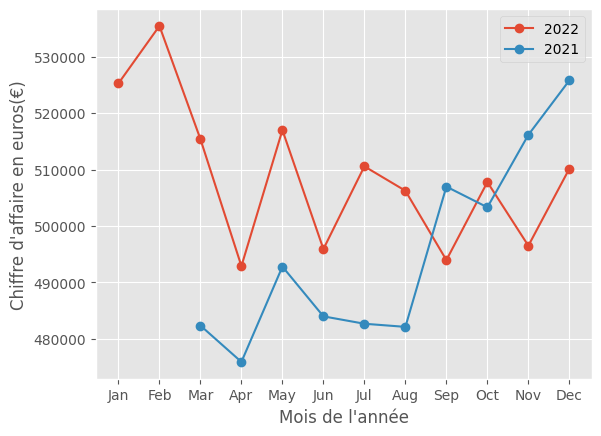

In [136]:
plt.plot(ca_by_month_2022["Month"], ca_by_month_2022["price"], linestyle="-", marker="o", label="2022")
plt.plot(ca_by_month_2021["Month"], ca_by_month_2021["price"], linestyle="-", marker="o", label="2021")
plt.ylabel("Chiffre d'affaire en euros(€)")
plt.xlabel("Mois de l'année")
plt.legend()
plt.show()

Le chiffre d'affaire pour l'année 2021 est de : 4952065.650261295  €
Le chiffre d'affaire pour l'année 2022 est de : 6107006.93  €


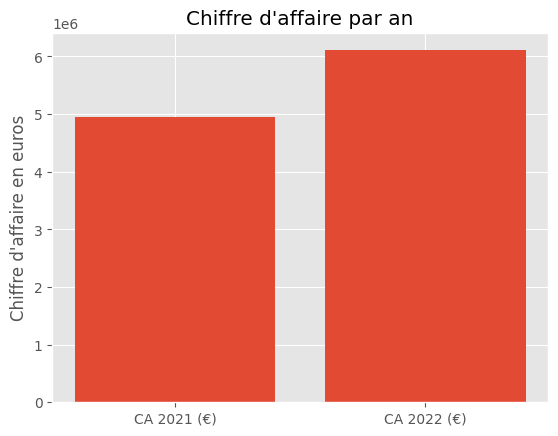

In [137]:
print("Le chiffre d'affaire pour l'année 2021 est de :",ca_by_month_2021["price"].sum()," €")
print("Le chiffre d'affaire pour l'année 2022 est de :",ca_by_month_2022["price"].sum()," €")

height = [ca_by_month_2021["price"].sum(), ca_by_month_2022["price"].sum()]
bars = ("CA 2021 (€)", 'CA 2022 (€)')

fig, ax = plt.subplots()

ax.bar(bars, height)

ax.set_ylabel("Chiffre d'affaire en euros")
ax.set_title("Chiffre d'affaire par an")

plt.show()

# Effectuer la moyenne mobile

In [138]:
#On sépare la date de l'heure
mergin_df[["date", "hour"]] = mergin_df.date.str.split(" ", expand=True)

On groupe nos données par jour pour ensuite pouvoir réaliser la moyenne mobile

In [139]:
mergin_df["date"] = pd.to_datetime(mergin_df["date"])
data_for_rolling_avg = mergin_df[["price","date"]].set_index("date").groupby(pd.Grouper(freq="D")).sum()

On somme les données de prédiction pour toutes les catégories pour le mois d'octobre et on remplace les valeurs

In [140]:
df_octobre_2021["sum"] = df_octobre_2021[0]+df_octobre_2021[1]+df_octobre_2021[2]
df_octobre_2021.head()

categ,0,1,2,sum
date,,,,
1,6950.50,7003.790000,3104.05,17058.340000
2,7141.01,6761.976520,2041.12,15944.106520
3,6786.57,6665.899048,2206.48,15658.949048
4,6533.60,6824.382710,2746.08,16104.062710
5,6357.91,6822.163468,3032.55,16212.623468


In [141]:
#Remplacer les valeurs par les valeurs de la prédiction

data_for_rolling_avg["price"].loc[(data_for_rolling_avg.index >= '2021-10-01') & 
(data_for_rolling_avg.index<= '2021-10-31')] = df_octobre_2021['sum'].values

On réalise notre moyenne mobile et notre plot on peut voir que la moyenne mobile sur 7 jours lisse les données

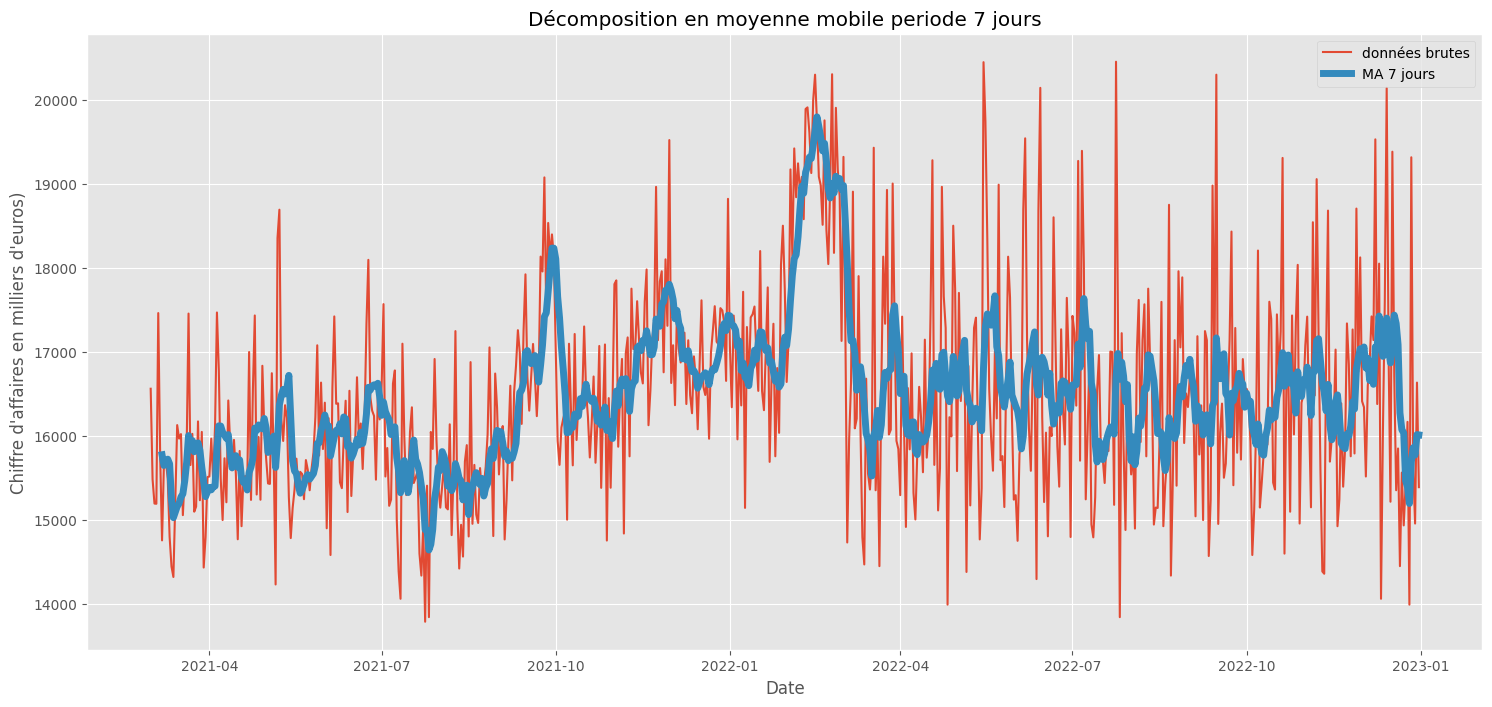

In [142]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))

plt.plot(data_for_rolling_avg,label= 'données brutes')
plt.plot(data_for_rolling_avg.rolling(7).mean(),label= 'MA 7 jours', lw=5)

plt.legend(loc='best')
plt.title('Décomposition en moyenne mobile periode 7 jours')
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires en milliers d'euros)")
plt.show()

# Trouver les références tops et flops

In [143]:
df_produit = mergin_df.groupby('id_prod').agg({"id_prod":"count", 'price':'sum'})

In [144]:
df_produit = df_produit.rename(columns = {"id_prod": "nombre de ventes"})
df_produit.nlargest(10, columns = "price")

,nombre de ventes,price
id_prod,,
2_159,597,87156.03
2_135,928,64022.72
2_112,872,58921.04
2_102,924,54645.36
2_209,745,52142.55
1_395,1714,49688.86
2_110,791,49239.75
1_369,2048,49131.52
2_39,830,48131.70


In [145]:
df_produit.nsmallest(10, columns = "price")

,nombre de ventes,price
id_prod,,
0_1539,1,0.99
0_1840,1,1.28
0_1284,1,1.38
0_1653,2,1.98
0_1601,1,1.99
0_541,1,1.99
0_807,1,1.99
0_1728,1,2.27
0_1498,1,2.48


# Répartition du chiffre d'affaire par catégorie

Création de notre dataframe pour pouvoir réaliser un plot

In [146]:
df_categ = mergin_df.groupby(["categ"]).agg({"client_id" : 'count', "price" : "sum"})

df_categ.rename(columns={"client_id" : "nombre_vente", "price" : "CA_by_product"}, inplace=True)

df_categ=pd.DataFrame(df_categ)
df_categ.reset_index(inplace=True)

Réalisation de notre pie chart

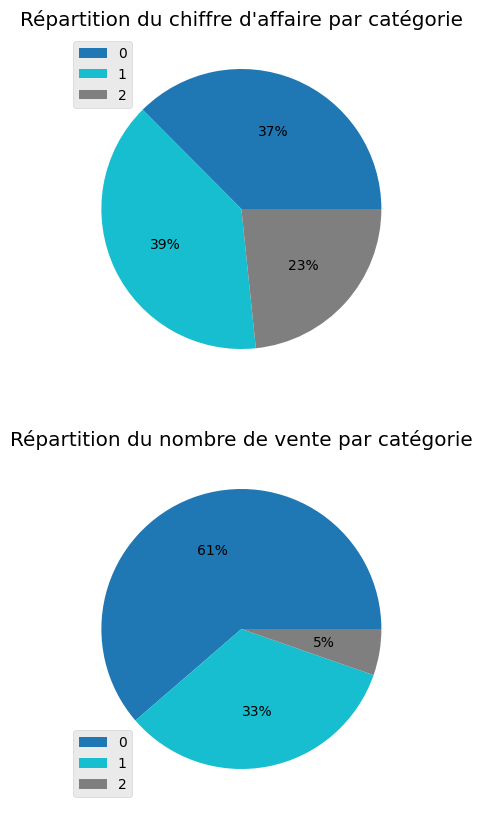

In [147]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
colors = ['tab:blue', 'tab:cyan', 'tab:gray']
ax[0].pie(df_categ["CA_by_product"], colors = colors, autopct='%.0f%%')
ax[0].legend(df_categ["categ"])
ax[0].set_title("Répartition du chiffre d'affaire par catégorie")


ax[1].pie(df_categ["nombre_vente"], colors = colors, autopct='%.0f%%')
ax[1].legend(df_categ["categ"])
ax[1].set_title("Répartition du nombre de vente par catégorie")
plt.show()

On réalise un boxplot en fonction des catégories

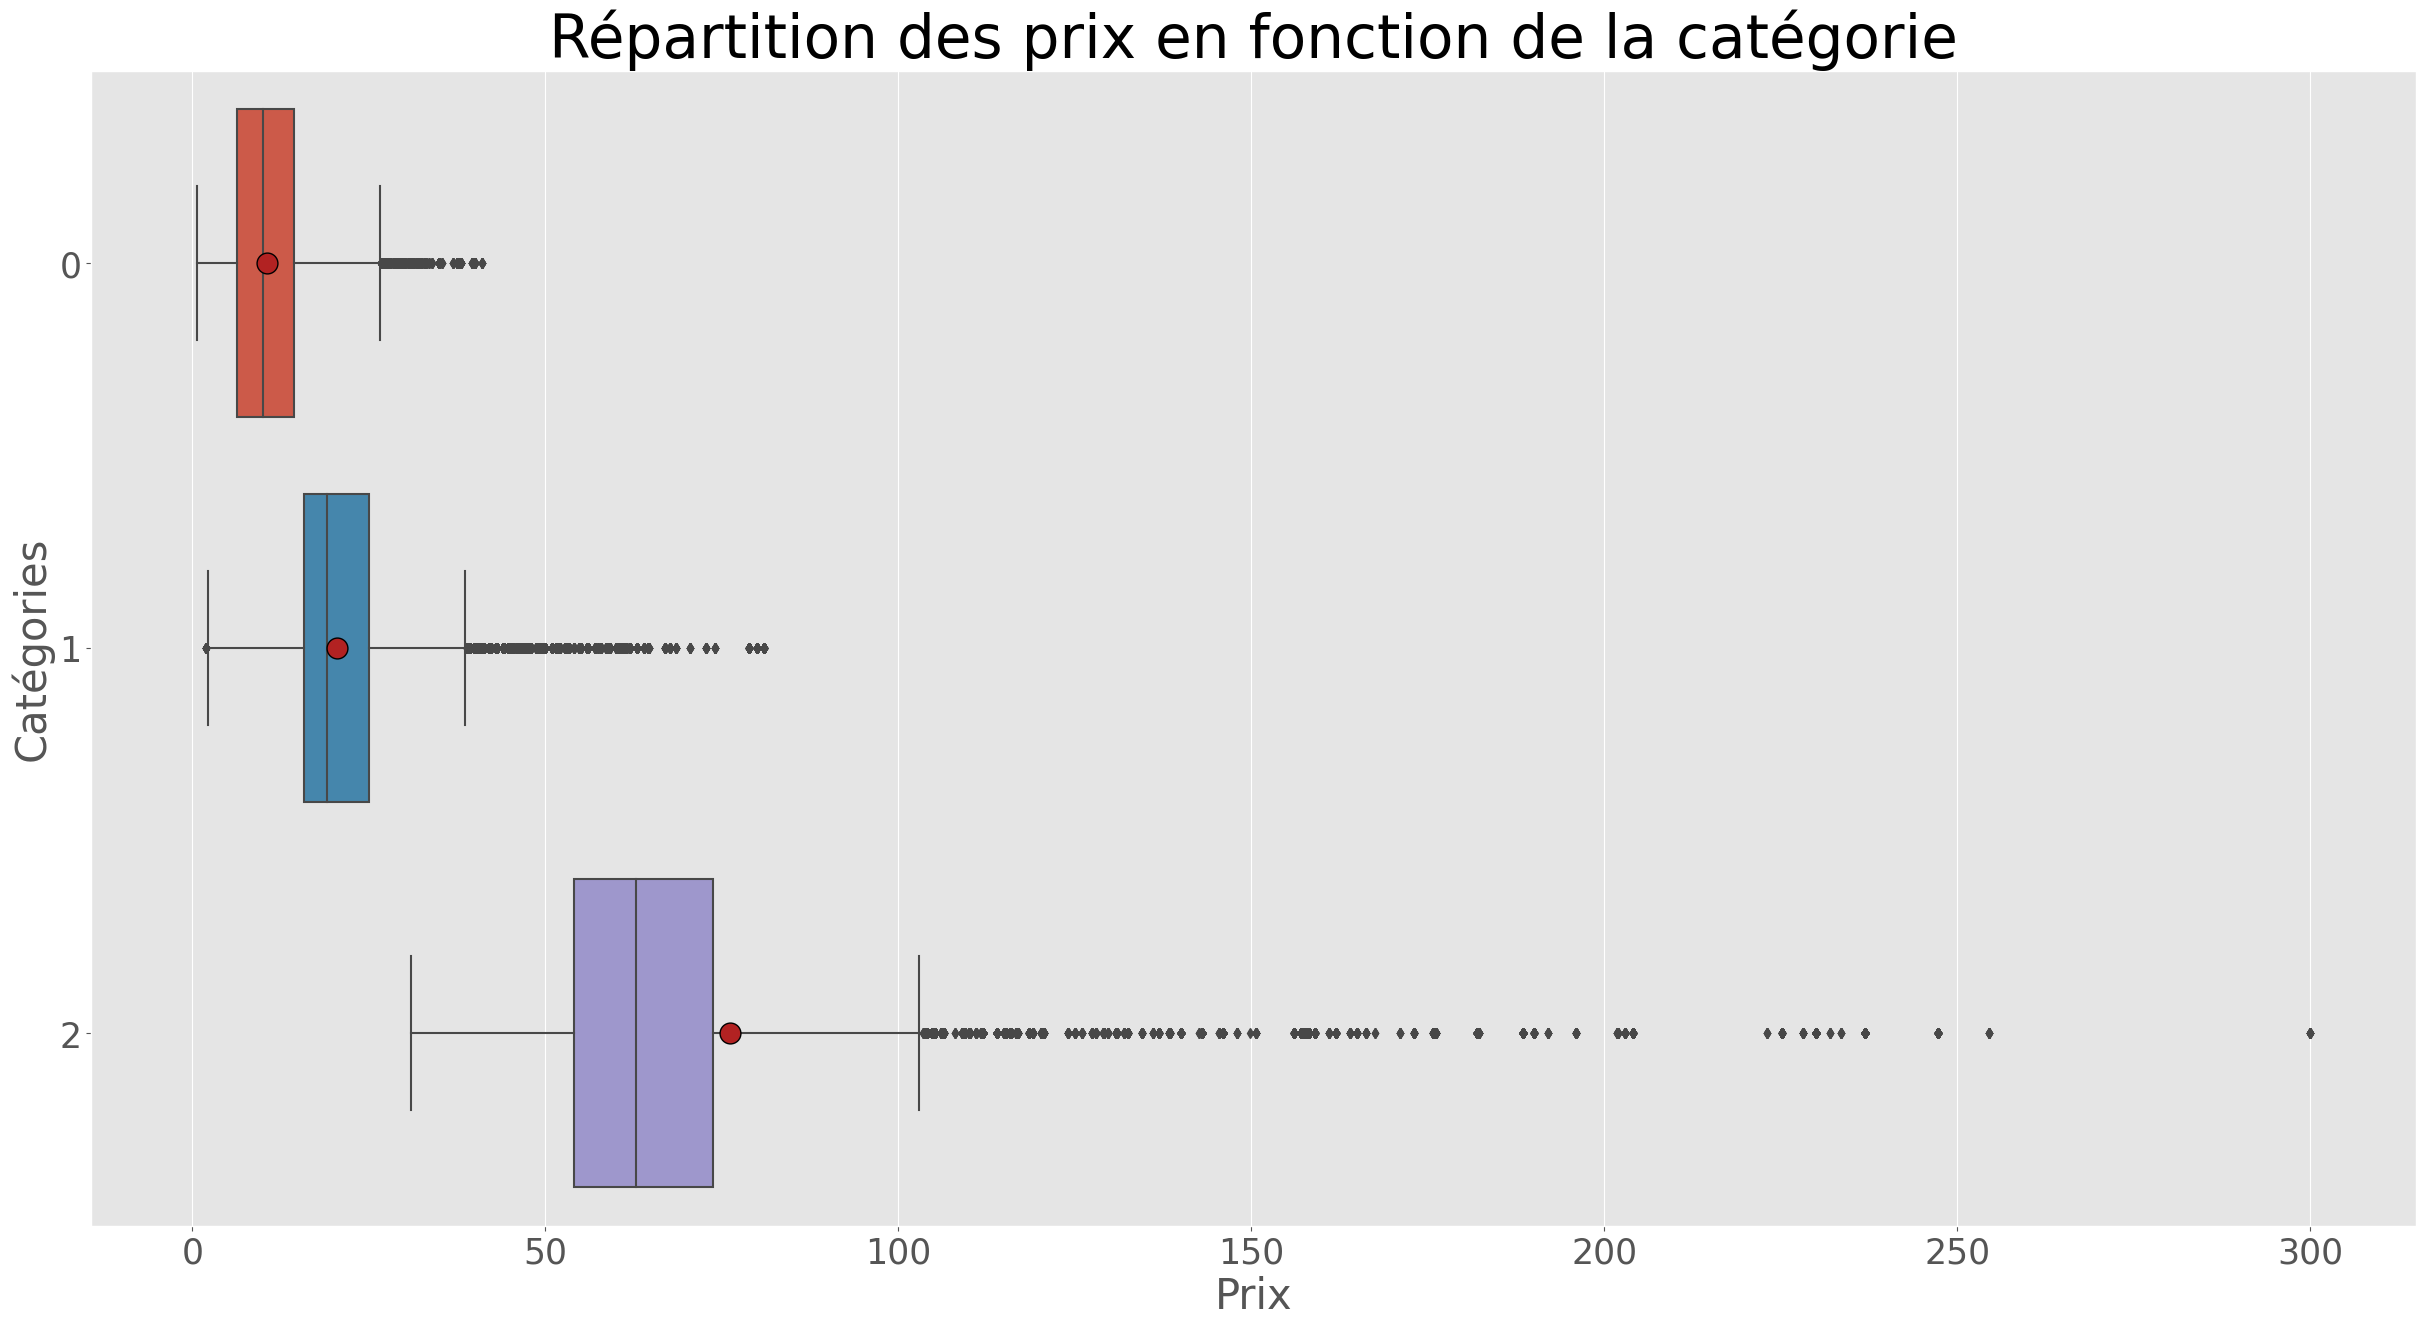

In [148]:
mergin_df.categ=mergin_df.categ.astype("category")

meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick', "markersize":'15'}

plt.figure(figsize=(30,15))
sns.boxplot(y="categ", x="price",data=mergin_df, showmeans=True, meanprops=meanprops)
plt.title('Répartition des prix en fonction de la catégorie', fontsize='43')
plt.xlabel('Prix', fontsize='30')
plt.ylabel("Catégories", fontsize='30')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

# Réalisation de la courbe de Lorenz et de l'indice de Gini

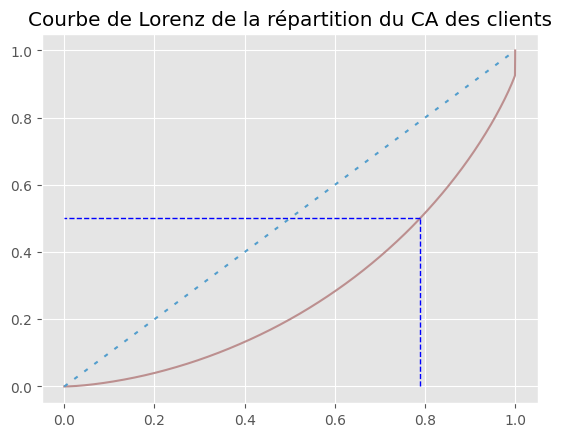

indice de gini: 0.45


In [149]:
client_lorenz = mergin_df[["client_id", "price"]].groupby("client_id").sum()

cum = client_lorenz['price'].cumsum()
price = client_lorenz['price']
n = len(cum)
lorenz = np.cumsum(np.sort(price)) / price.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

medial = lorenz[(lorenz < 0.5)].size / lorenz.size # Calcul de l'intersection

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, color='rosybrown', label='Lorenz')
plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4], color='#539ecd')

plt.vlines(medial, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=medial, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz de la répartition du CA des clients')
plt.show()

aire_ss_courbe = lorenz[:-1].sum() / len(lorenz)
S = 0.5 - aire_ss_courbe
gini = 2*S
print(f'indice de gini: {gini:.2f}')

In [150]:
client_lorenz.nlargest(20,columns = "price")

,price
client_id,
c_1609,299489.27
c_4958,266768.28
c_6714,139623.29
c_3454,103881.22
c_3263,5025.11
c_8026,4889.93
c_1570,4792.89
c_7319,4790.71
c_2140,4777.18


On peut voir que 4 clients rapporte beaucoup plus d'argent que les autres, on approfondit ce point

# On affiche les 4 gros clients et leur dépense par catégorie de produit

In [151]:
#on créée un nouveau dataframe permettant de garder que ces 4 gros clients
quatre_gros_client = client_lorenz.nlargest(4,columns = "price").index.to_list()

df_quatre_client = mergin_df.loc[mergin_df["client_id"].isin(quatre_gros_client)]
df_quatre_client['Month'] = df_quatre_client["date"].dt.month
df_quatre_client['year'] = df_quatre_client["date"].dt.year

C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\2547826591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quatre_client['Month'] = df_quatre_client["date"].dt.month
C:\Users\antoi\AppData\Local\Temp\ipykernel_18700\2547826591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quatre_client['year'] = df_quatre_client["date"].dt.year


In [152]:
df_quatre_client.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,hour,Month,year
4607,0_1518,2022-04-27,s_200245,c_1609,4.18,0,m,1980,43,17:10:40.102676,4,2022
4608,0_1518,2021-12-20,s_137046,c_1609,4.18,0,m,1980,43,04:12:39.844775,12,2021
4610,0_1518,2021-05-27,s_40318,c_1609,4.18,0,m,1980,43,17:10:40.102676,5,2021
4611,0_1518,2021-10-13,s_104281,c_1609,4.18,0,m,1980,43,18:00:08.691379,10,2021
4612,0_1518,2022-12-05,s_307418,c_1609,4.18,0,m,1980,43,11:37:00.430379,12,2022


In [153]:
pivot_tab = pd.pivot_table(df_quatre_client, index = ["client_id",'year','Month'], columns = 'categ', values = 'price',aggfunc={'price':'sum'})
pivot_tab = pivot_tab.reset_index("client_id")

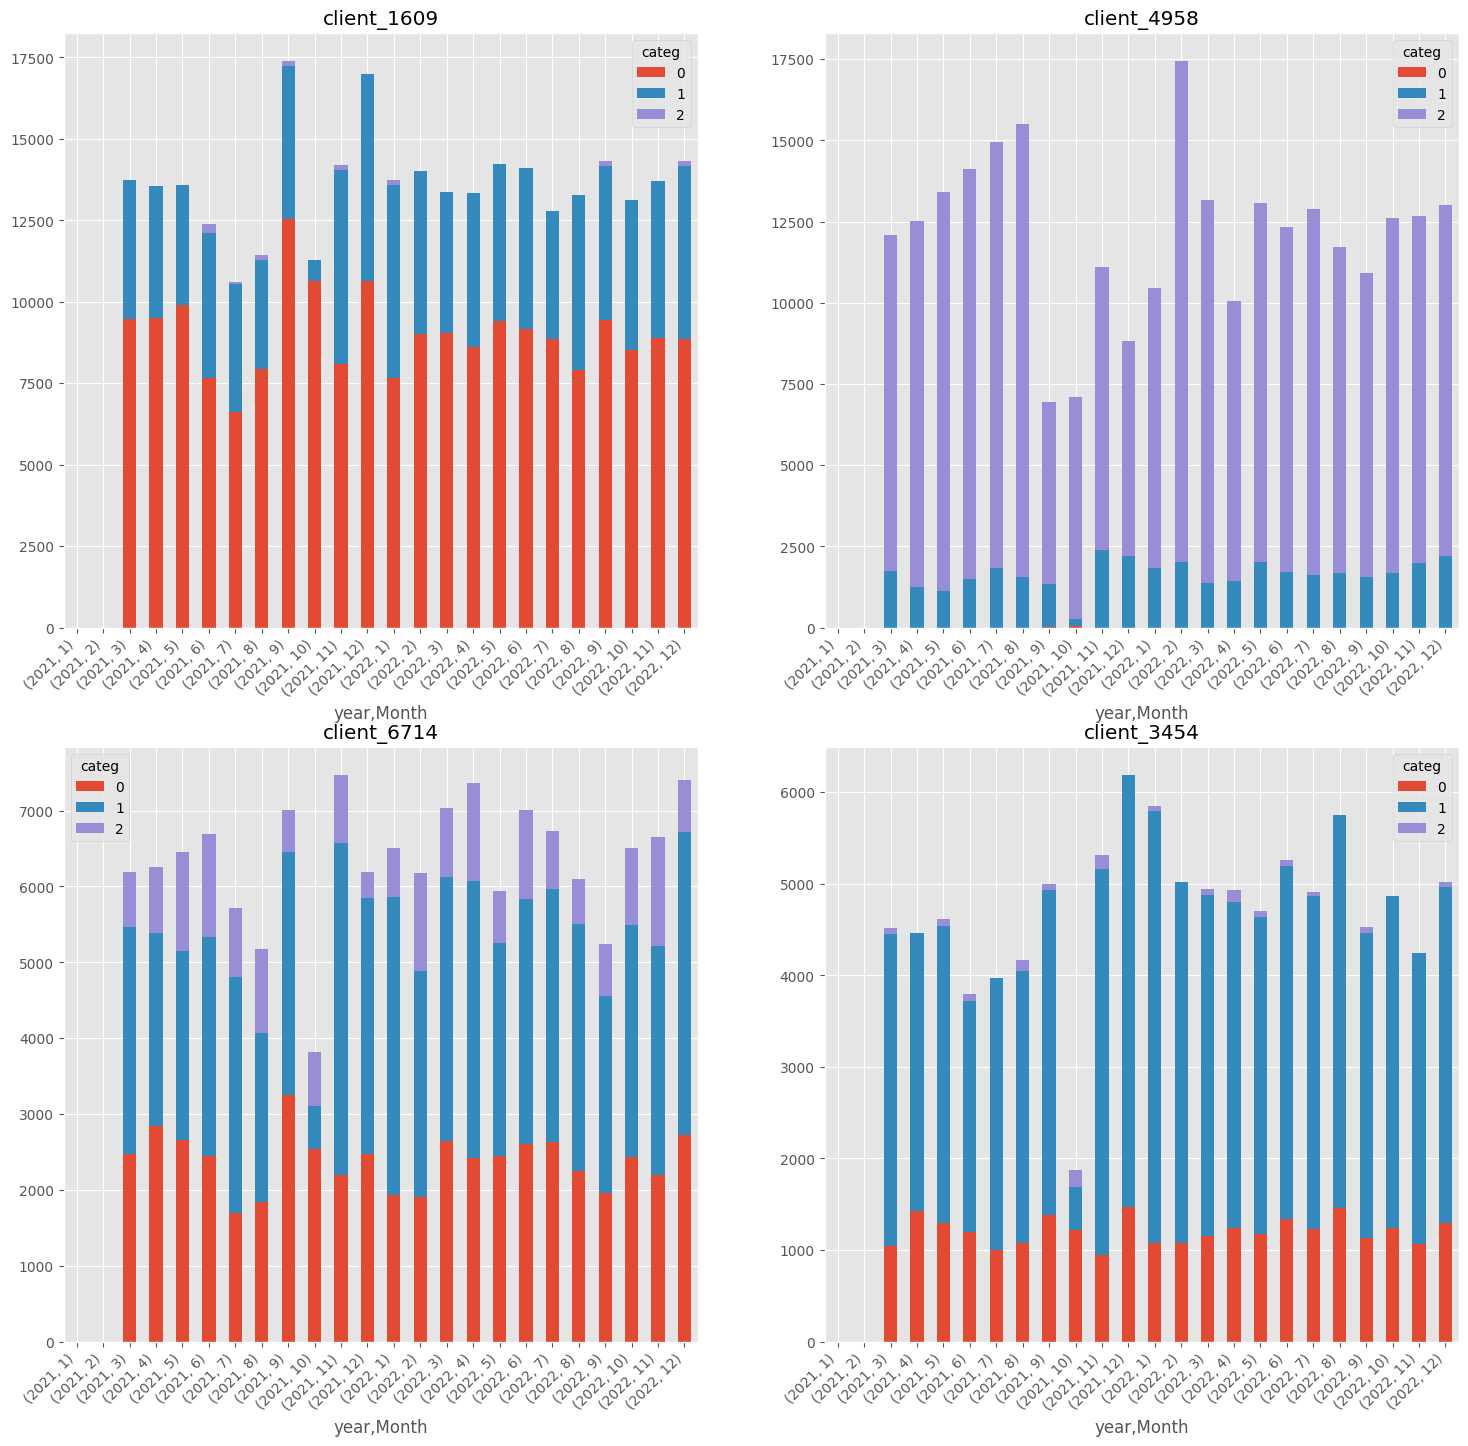

In [154]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18, 17))
pivot_tab.loc[pivot_tab["client_id"] == "c_1609"].plot(kind= 'bar',stacked = True, ax=axes[0,0]); axes[0,0].set_title('client_1609'); 
pivot_tab.loc[pivot_tab["client_id"] == "c_4958"].plot(kind= 'bar',stacked = True, ax=axes[0,1]); axes[0,1].set_title('client_4958')
pivot_tab.loc[pivot_tab["client_id"] == "c_6714"].plot(kind= 'bar',stacked = True, ax=axes[1,0]); axes[1,0].set_title('client_6714')
pivot_tab.loc[pivot_tab["client_id"] == "c_3454"].plot(kind= 'bar',stacked = True, ax=axes[1,1]); axes[1,1].set_title('client_3454')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45, ha ='right')
    
plt.show()

# Représentation graphique du nombre de client par âge et par sexe

In [155]:
client_df = mergin_df[["client_id", "age", "sex","price"]].groupby("client_id").max()
client_df.loc[client_df["price"] == client_df["price"].max()]


,age,sex,price
client_id,,,
c_1001,41,m,300.0
c_2329,27,f,300.0
c_2467,26,f,300.0
c_4958,24,m,300.0
c_5237,24,m,300.0
c_659,22,f,300.0


Text(0.5, 1.0, "Distribution des clients en fonction de l'âge")

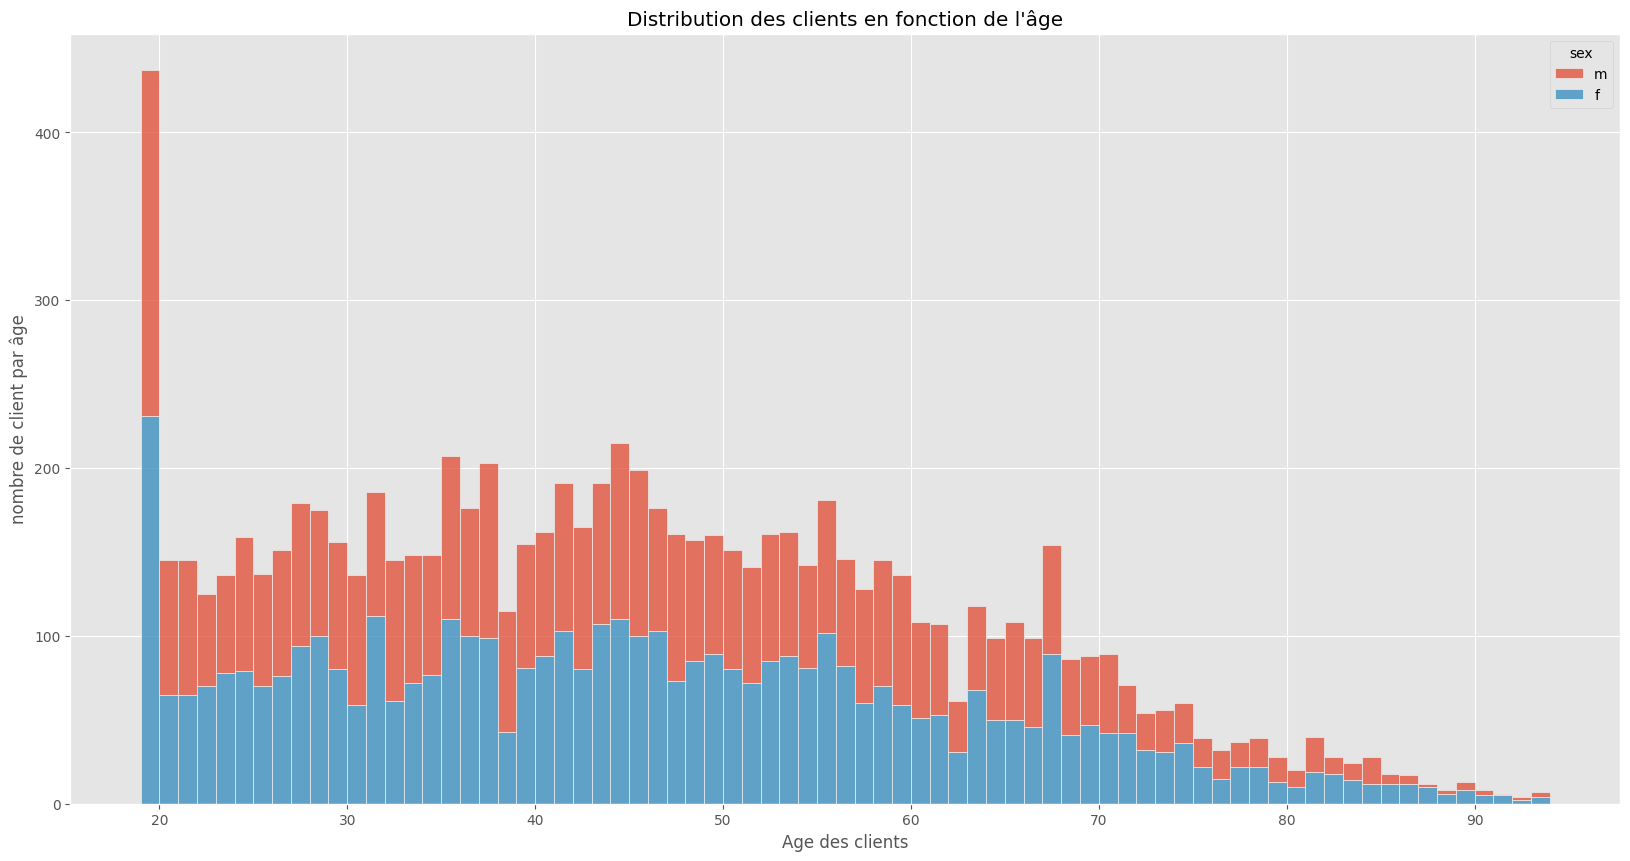

In [156]:
labels = client_df["age"].to_list()
men_means = client_df["price"][client_df["sex"] == "m"].to_list()
women_means = client_df["price"][client_df["sex"] == "f"].to_list()
width = 0.35  


fig, ax = plt.subplots(figsize = (20,10))



sns.histplot(data=client_df, x="age", hue="sex", multiple="stack", bins=75)
plt.xlabel("Age des clients")
plt.ylabel("nombre de client par âge")
plt.title("Distribution des clients en fonction de l'âge")

## Proportion de client par sexe

In [157]:

total_prop = len(client_df.index)

wemen_prop = len(client_df.index[client_df["sex"] == "f"])

print ("La proportion de client féminin est de : {:.2f}".format(wemen_prop/total_prop * 100), "%")

La proportion de client féminin est de : 52.08 %


In [158]:
total_prop = len(client_df.index)

men_prop = len(client_df.index[client_df["sex"] == "m"])

print ("La proportion de client masculin est de : {:.2f}".format(men_prop/total_prop * 100), "%")

La proportion de client masculin est de : 47.92 %


# Savoir si l'âge et la catégorie de produit sont liés

- H0 : Le genre d'un client et la catégorie de produit sont indépendant
- H1 : Le genre d'un client et la categorie de produit sont dépendant

Création du tableau de contingence

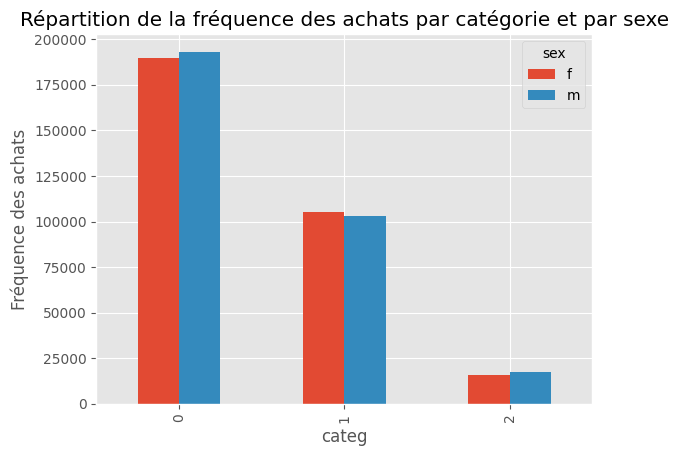

In [159]:
ed_contingency = pd.crosstab(mergin_df['categ'], mergin_df['sex'])
ed_contingency.plot(kind = "bar")
plt.ylabel("Fréquence des achats")
plt.title("Répartition de la fréquence des achats par catégorie et par sexe")
plt.show()

In [160]:
chi2_stat, pvalue, dof, exp = chi2_contingency(ed_contingency, correction = True)
pvalue

5.247602097472963e-32

Ici notre p value est inférieur à 0.05 nous pouvons donc rejetter notre hypothèse H0 est nous pouvons conclure que le genre d'un client et le type de produit sont dépendants. Le genre serait donc un prédicteur de la catégorie choisie.

In [161]:
X = "categ"
Y = "sex"

cont = mergin_df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

sex,f,m,Total
categ,,,
0,189921,193114,383035
1,105237,102832,208069
2,15761,17593,33354
Total,310919,313539,624458


# On regarde les corrélations entre l'âge et la fréquence d'achat, le montant des achats et le prix moyen des achats par âge des clients

In [162]:
age = mergin_df.groupby('age')['price'].agg(['count', 'sum']).reset_index()

Fréquence des achats par type de client

(15.0, 95.0)

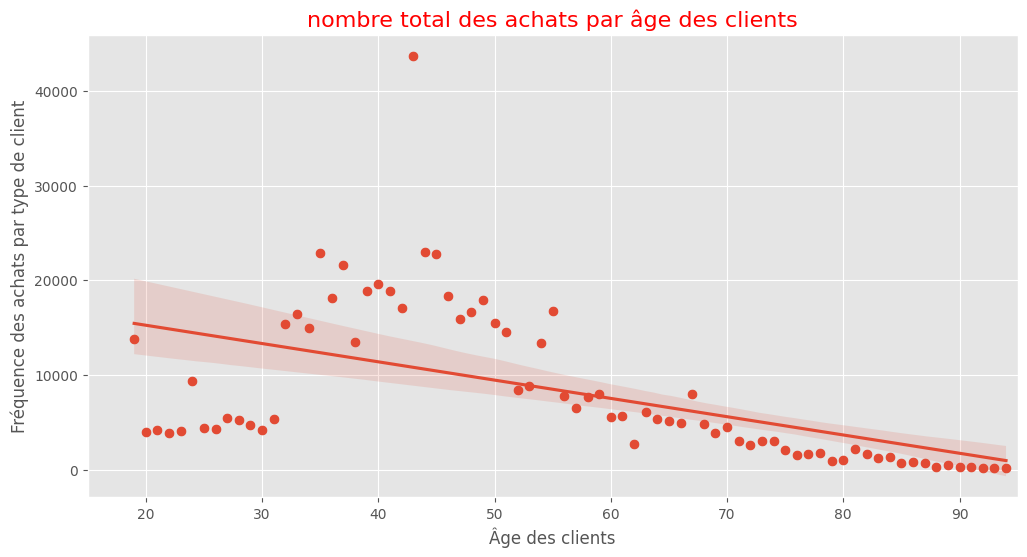

In [163]:
plt.figure(figsize=(12, 6))
sns.regplot(x='age', y='count', data = age, order = 1)
plt.scatter(age['age'],age['count'])
plt.ylabel('Fréquence des achats par type de client')
plt.xlabel('Âge des clients')
plt.title("nombre total des achats par âge des clients",fontsize= 16, color = 'red')
plt.xlim(15,95)

In [164]:
print('La covariance est de:', np.cov(age['age'], age['count'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', st.pearsonr(age['age'], age['count'])[0])

La covariance est de: -92912.05263157893
Le coefficient de corrélation linéaire est de: -0.5328312002200934


Montant total des achats par âge des clients

(15.0, 95.0)

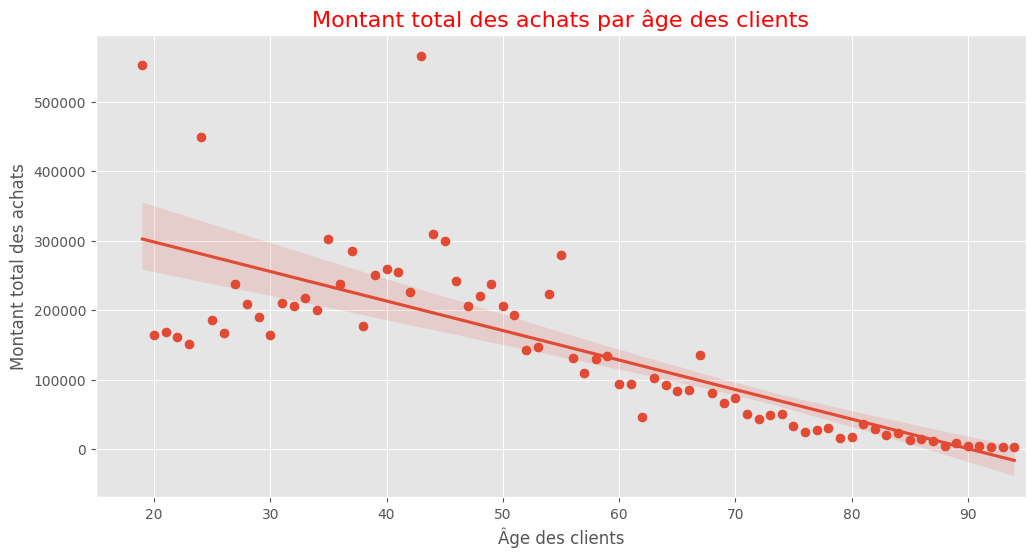

In [165]:
plt.figure(figsize=(12, 6))
sns.regplot(x='age', y='sum', data = age, order = 1)
plt.scatter(age['age'],age['sum'])
plt.ylabel('Montant total des achats')
plt.xlabel('Âge des clients')
plt.title("Montant total des achats par âge des clients",fontsize= 16, color = 'red')
plt.xlim(15,95)

In [166]:
print('La covariance est de:', np.cov(age['age'], age['sum'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', st.pearsonr(age['age'], age['sum'])[0])

La covariance est de: -2043063.4727631574
Le coefficient de corrélation linéaire est de: -0.7782627978402876


Prix moyen des achats par âge des clients

(15.0, 95.0)

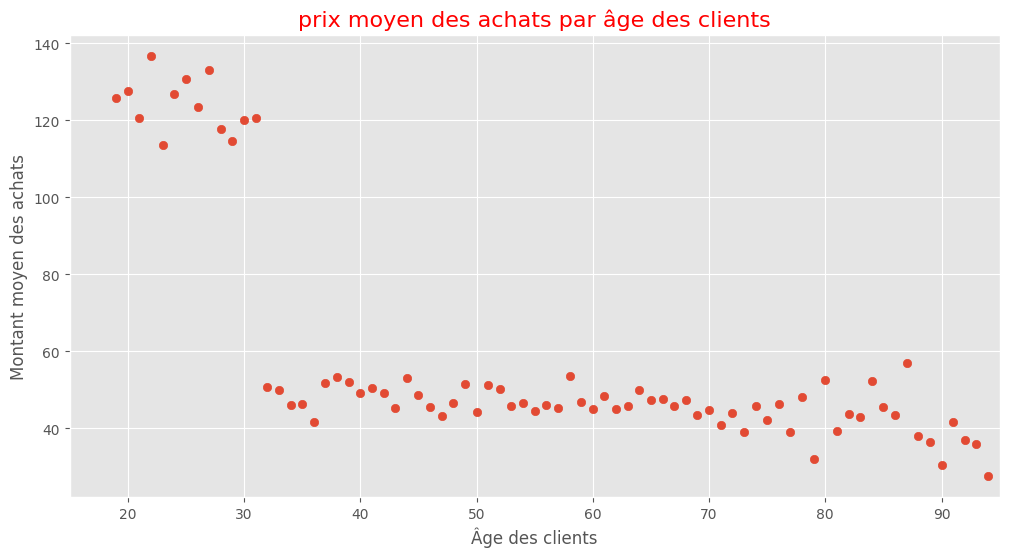

In [167]:
client_df = client_df[["price","age"]].groupby("age").mean().reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(client_df['age'],client_df['price'])
plt.ylabel('Montant moyen des achats')
plt.xlabel('Âge des clients')
plt.title("prix moyen des achats par âge des clients",fontsize= 16, color = 'red')
plt.xlim(15,95)

Quand on voit la forme du graphique il ne fait pas de sens de caculer un coefficient de correlation dans ce cas

# On regarde la répartition des clients féminins par catégorie

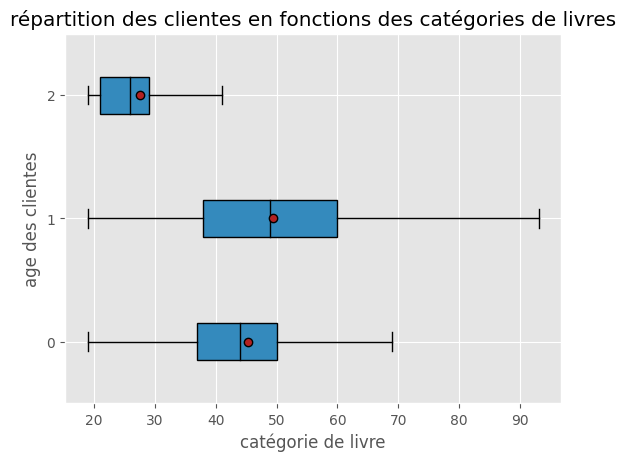

In [168]:
age_by_categ = mergin_df[["session_id","sex","age","categ"]]

X = "categ" # qualitative
Y = "age" # quantitative

# On ne garde que les femmes
sous_echantillon = age_by_categ.loc[age_by_categ["sex"] == "f", :].copy()

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("catégorie de livre"); plt.ylabel("age des clientes")
plt.title("répartition des clientes en fonctions des catégories de livres")
plt.show()

In [169]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.11035008402288797

Hypothèses :
- H0 il n'existe aucune différence entre les groupes
- H1 il existe au moins une différence entre ces groupes

In [170]:
f_stat, pvalue = st.f_oneway(sous_echantillon[sous_echantillon[X]==0][Y], sous_echantillon[sous_echantillon[X]==1][Y],
                            sous_echantillon[sous_echantillon[X]==2][Y])
f_stat, pvalue

(19282.64484034077, 0.0)

In [171]:
stats.kstest(sous_echantillon[sous_echantillon[X]==0][Y], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [172]:
stats.kstest(sous_echantillon[sous_echantillon[X]==1][Y], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [173]:
stats.kstest(sous_echantillon[sous_echantillon[X]==2][Y], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

Nos données ne suivent pas la loi normale donc nous ne pouvons pas effectuer une ANOVA car on risque d'avoir des biais

On va alors transformer nos données d'âge en catégorie d'âge

In [174]:
labels = ["18-29", "30-49", "50-60", "60-79", "80-100"]
mergin_df["group"] = pd.cut(mergin_df["age"],len(labels), labels=labels)
mergin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624458 entries, 0 to 679110
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     624458 non-null  object        
 1   date        624458 non-null  datetime64[ns]
 2   session_id  624458 non-null  object        
 3   client_id   624458 non-null  object        
 4   price       624458 non-null  float64       
 5   categ       624458 non-null  category      
 6   sex         624458 non-null  object        
 7   birth       624458 non-null  int64         
 8   age         624458 non-null  int64         
 9   hour        624458 non-null  object        
 10  group       624458 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 48.8+ MB


In [181]:
stat, p = st.kruskal(sous_echantillon[sous_echantillon[X]==0][Y], sous_echantillon[sous_echantillon[X]==1][Y],
                            sous_echantillon[sous_echantillon[X]==2][Y])
print("Kruskal-Wallis Test p-value: ", p)

Kruskal-Wallis Test p-value:  0.0


Il existe des différences statistiquement significatives entre les âges moyens des acheteurspour chaque catégorie de livres.

In [ ]:
# Effectuer un test de Kruskal-Wallis à 4 voies
data = [age1, age2, age3, age4]
stat, p = kruskal(*data)
print("Kruskal-Wallis Test p-value: ", p)

Text(0.5, 0, "Tranche d'âge")

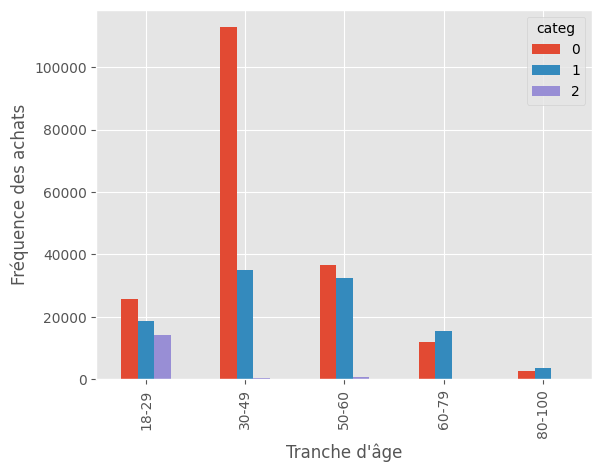

In [ ]:
mergin_df_femme = mergin_df.loc[age_by_categ["sex"] == "f", :]
age_group_femme = pd.crosstab(mergin_df_femme['group'], mergin_df_femme['categ'])
age_group_femme.plot(kind = "bar")
plt.ylabel("Fréquence des achats")
plt.xlabel("Tranche d'âge")

In [ ]:
X = "group"
Y = "categ"

cont_age = mergin_df_femme[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

In [ ]:
chi2_stat, pvalue, dof, exp = chi2_contingency(cont_age, correction = True)
pvalue

0.0

La catégorie de livre est dépendante de la tranche d'âge chez les femmes

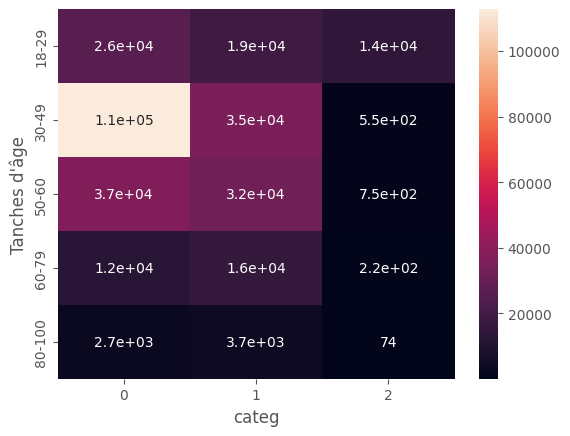

In [ ]:
tx = cont_age.loc[:,["Total"]]
ty = cont_age.loc[["Total"],:]
n = len(mergin_df_femme)
indep = tx.dot(ty) / n

c = cont_age.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = mergin_df_femme[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
sns.heatmap(table,annot=True)
plt.ylabel("Tanches d'âge")
plt.show()

# On regarde la répartition des clients masculins par catégorie

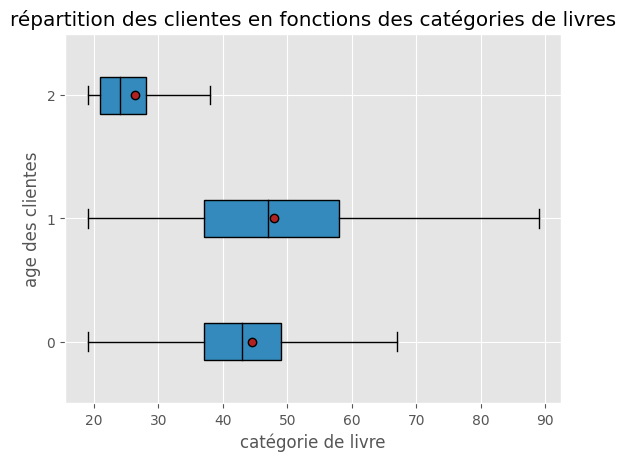

In [ ]:
age_by_categ = mergin_df[["session_id","sex","age","categ"]]

X = "categ" # qualitative
Y = "age" # quantitative

# On ne garde que les femmes
sous_echantillon = age_by_categ.loc[age_by_categ["sex"] == "m", :].copy()

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
   
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("catégorie de livre"); plt.ylabel("age des clientes")
plt.title("répartition des clientes en fonctions des catégories de livres")
plt.show()

In [ ]:
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.12779343875341534

In [ ]:
stats.kstest(sous_echantillon[sous_echantillon[X]==0][Y], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [ ]:
stats.kstest(sous_echantillon[sous_echantillon[X]==1][Y], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [ ]:
stats.kstest(sous_echantillon[sous_echantillon[X]==2][Y], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

Text(0.5, 0, "Tranche d'âge")

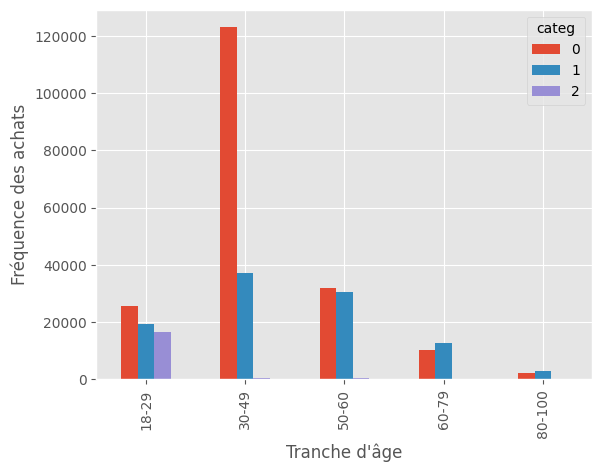

In [ ]:
mergin_df_man = mergin_df.loc[age_by_categ["sex"] == "m", :]
age_group_man = pd.crosstab(mergin_df_man['group'], mergin_df_man['categ'])
age_group_man.plot(kind = "bar")
plt.ylabel("Fréquence des achats")
plt.xlabel("Tranche d'âge")

In [ ]:
X = "group"
Y = "categ"

cont_age_man = mergin_df_man[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

In [ ]:
chi2_stat, pvalue, dof, exp = chi2_contingency(cont_age_man, correction = True)
pvalue

0.0

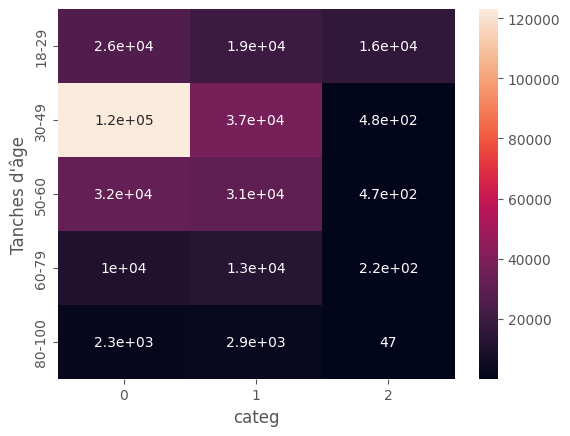

In [ ]:
tx = cont_age_man.loc[:,["Total"]]
ty = cont_age_man.loc[["Total"],:]
n = len(mergin_df_man)
indep = tx.dot(ty) / n

c = cont_age_man.fillna(0) # On remplace les valeurs nulles par 0
table = mergin_df_man[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
sns.heatmap(table,annot=True)
plt.ylabel("Tanches d'âge")
plt.show()